# TP 1 - Color representation spaces


**Ishihara's test**

This test, invented in 1917 by Shinobu Ishihara, is a collection of 38 plates used to screen for color vision anomalies, some examples of which are illustrated in figure 1.

![](https://gitlab.com/jeromefarinas/m1-ufar/-/raw/4ec177e900b642de597ffeb21d8952d936789e4e/ScientificComputing/TP/TP1_PCA/ExTP1.png)


These tests, consisting of "pseudoisochromatic" plates, are most frequently used to detect congenital deficiencies in the red and green hues. Some also test for abnormalities in blue perception.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image


from mpl_toolkits.mplot3d import Axes3D

### Interesting python functions :
List of functions (libraries) :

- cov (numpy)
- transpose (numpy)
- corrcoef (numpy)
- linal.eig (numpy)
- reshape (numpy)
- @ (produit matriciel) ou dot (numpy)


## Exercise 1 - Correlations and contrasts of RGB plates

The following lines read the image $ishihara-0.png$ coded in RGB
(Red, Green, Blue) and stores it in a three-dimensional matrix $I$ of size $height \times width \times 3$.

This matrix can be separated into three two-dimensional sub-matrices called channels: $R = I(i,j,0)$ for the red channel, $V = I(i,j,1)$ for the green channel, and $B = I(i,j,2)$ for the blue channel.

Each of these is made up of integers between 0 and 255, representing the luminous intensity of the pixel located on row $i$ and column $j$. By virtue of their names, each channel therefore contributes a share of color to the image, be it red, green or blue.

### R, G and B representations

Image loading (uncomment)

In [2]:
# Import files from your computer to Google Colab :

#from google.colab import files

#uploaded = files.upload()

In [ ]:
# or get the files from gitlab
!git clone https://gitlab.com/jeromefarinas/m1-ufar.git
cd /content/m1-ufar/ScientificComputing/TP/TP1_PCA

float32
(1536, 1985)
1.0


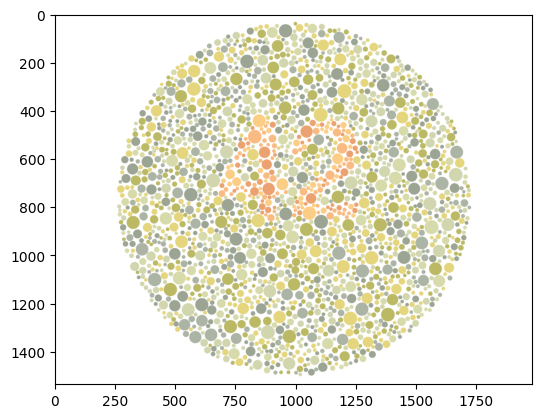

In [10]:
 # Load the file in a matrix of color pixels.
Data=image.imread("ishihara-0.png")

# displays the dimensions of the matrix.
print(Data.dtype)
print(Data.shape[0:2])

# accesses the value of the first pixel.
print(Data[0,0,0])


# View image
plt.imshow(Data)
plt.show()

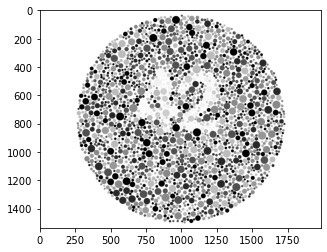

In [ ]:
# Split the image into three channels and convert to dual :
R=Data[:,:,0]
G=Data[:,:,1]
B=Data[:,:,2]

# R channel display :
plt.imshow(R,cmap='gray')
plt.show()


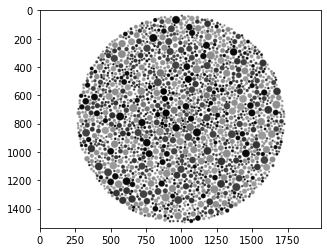

In [ ]:
# G channel display :
plt.imshow(G,cmap='gray')
plt.show()



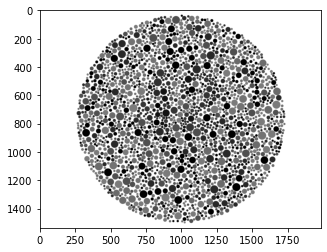

In [ ]:
# Channel B display :
plt.imshow(B,cmap='gray')
plt.show()



By displaying the $I$, $R$, $V$ and $B$ matrices as images, we can see that the images are similar, and we can distinguish a pattern in the shades of red.

In the following, pixels are considered as $R^3$ points, displayed in a frame whose axes correspond to the three color levels.

(3048960,)


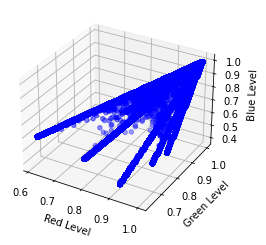

In [ ]:
# Image transformation into a 3D pixel cloud: the three channels are vectorized and concatenated
R=np.ravel(R)
G=np.ravel(G)
B=np.ravel(B)

print(R.shape)

# Displaying the pixel cloud in the RGB frame :
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(R, G, B, c='b', marker='o')

ax.set_xlabel('Red Level')
ax.set_ylabel('Green Level')
ax.set_zlabel('Blue Level')

plt.show()

 They form an elongated beam in several directions, confirming the previous observation that the three channels are highly correlated.


### Study of the correlation between R, G and B colors

In [ ]:
# Data matrix :
dim=R.shape[0]

# The three channels are vectorized and concatenated
X=np.zeros([dim,3])
X[:,0]=R
X[:,1]=G
X[:,2]=B

print(X.shape)

(3048960, 3)


In [ ]:
# Calculate the variance/covariance matrix


In [ ]:
# Calculate linear correlation coefficients (np.corrcoef)

In [ ]:
# Calculate contrast proportions :

## Exercise 2 - Principal Component Analysis



Implement PCA:
1) extract the 3 eigenvectors, noted $X_1$, $X_2$, $X_3$, associated with the 3 largest eigenvalues of the variance-covariance matrix $\Sigma$ (by the functions *np.cov* and *np.linalg.eig*). These eigenvectors will constitute the new &
P reference frame, i.e. the principal axes.  
2) Then project the data into this new base by multiplying it by the base $P = [X_1X_2X_3]$.

In [ ]:
# Data matrix :
dim=R.shape[0]


# The three channels are vectorized and concatenated
X=np.zeros([dim,3])
X[:,0]=R
X[:,1]=G
X[:,2]=B

print(X.shape)

(3048960, 3)


Calculate the variance-covariance matrix using, for example, the function **np.cov**.

In [ ]:
# Variance/covariance matrix :

The $\Sigma$ variance/covariance matrix is symmetrical and real. It therefore has an orthonormal basis of eigenvectors.

Calculate its eigenvalues and eigenvectors by calling the function **np.linalg.eig**.

In [ ]:
# Calculation of Sigma eigenvalues/vectors :

In [ ]:
# Sorting eigenvalues:

 Calculate the matrix of the **principal components** of the pixels Then project the data into this new base by multiplying each vector by the base $P = [X_1X_2X_3]$.

In [ ]:
# Calculation of principal components
#i.e. the coefficients of projection on the principal axes:



In [ ]:
# Projection on the first principal component :



# Display this projection



In [ ]:
# Linear correlation coefficients :



In [ ]:
# Projection on the third principal component :


# Display this projection


## Study the correlation in the new reference basis

In [ ]:
# Variance/covariance matrix in the new basis :




In [ ]:
# Linear correlation coefficients :


In [ ]:
# Contrast proportions :



### Interpretation

The aim of the Ishihara test is to identify people who cannot distinguish a pattern in an image of approximately uniform luminance, appearing only in the chrominances. It is therefore intended that the pattern should only be distinguished in the second and/or third principal component(s).

#### How is this possible, given that contrast is supposed to be at its highest in the first principal component?

S. Ishihara has precisely created images with low contrast between the colors of the pattern and those of the rest of the image, while there is high contrast in luminance, thanks to the fact that his images contain many white pixels (between the colored patches).



## Exercise 3 - Quiz

Geek culture symbols are hidden in Ishihara mosaics (archive *Quizz_GroupeXX.zip*).

Use the ACP to bring them to light, and it's up to you to identify them!